(367, 667, 3)
(367, 667)


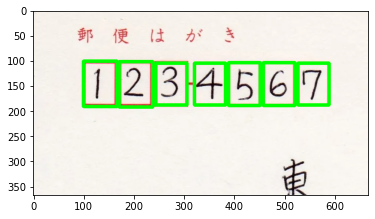

In [77]:
"""
ハガキ画像から郵便番号領域を抽出する
"""
def detect_zipno(filename):
    
    import cv2
    import matplotlib.pyplot as plt
    
    #画像の読み込み
    img=cv2.imread(filename)
    #画像のサイズ確認
    h, w=img.shape[:2]
    #画像の右上のみ抽出する
    img=img[0:h//4, w//3:]
    
    #画像の2値化
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray=cv2.GaussianBlur(gray, (3,3), 0)
    im2=cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)[1]
    print(im2.shape)
    
    #輪郭の抽出
    contours=cv2.findContours(im2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
    
    #抽出した輪郭をリストに格納
    result=[]
    for pt in contours:
        x, y, w, h=cv2.boundingRect(pt)
        #大きすぎたり、小さすぎたりする領域は除去
        if not(60<w<70):
            continue
        result.append([x,y,w,h])
        
    #抽出した輪郭が左側から並ぶようにソート
    result=sorted(result, key=lambda x: x[0])
    
    #抽出した輪郭が近すぎるものを除去
    result2=[]
    lastx=-100
    for x,y,w,h in result:
            if(x-lastx)<5: continue

            result2.append([x,y,w,h])
            lastx=x

    #緑色の枠を描く
    for x,y,w,h in result2:
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 5)
            
    return result2, img

if __name__=='__main__':
    #ハガキ画像を指定して、領域を抽出
    filename="post_card.png"
    cnts, img=detect_zipno(filename)
    
    #画面に抽出結果表示
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.savefig("detect-zip.png", dpi=200)
    plt.show()